In [89]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import cv2
import copy

def imgshow(img):
    if len(img.shape) == 3:
        plt.imshow(img[:, :, ::-1])
    else:
        plt.imshow(img,cmap='gray',vmin=0, vmax=255)
    plt.show() 



In [86]:
h = 480
w = 640

view_angle = 120

angle_factor = w/view_angle

lines = [[(100,100),(540-1,100)],
         [(100,380-1),(540-1,380-1)],  
         [(100,100),(100,380-1)], 
         [(540-1,100),(540-1,380-1)], 
        ]




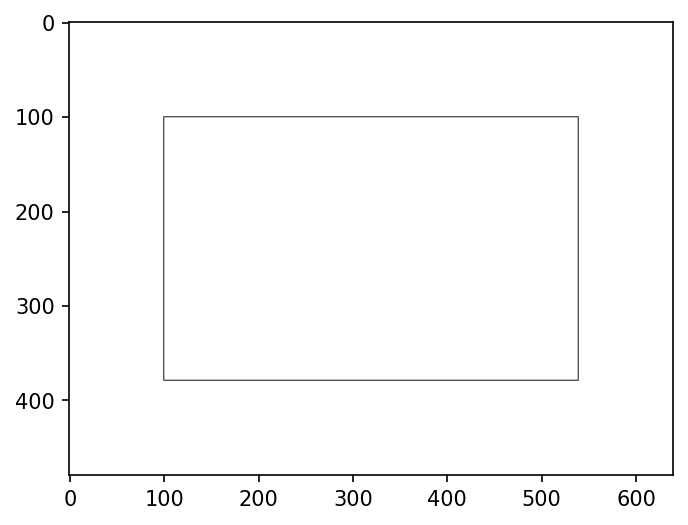

In [100]:
img = np.ones((480,640,3), dtype=np.uint8)*255

for line in lines:
    img = cv2.line(img, line[0], line[1], (0,0,0), 1)
    

imgshow(img)

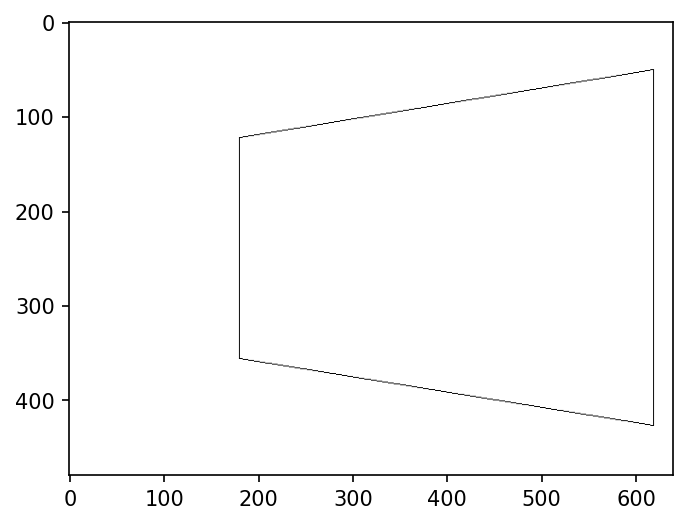

In [98]:
img = np.ones((480,640,3), dtype=np.uint8)*255
angle_x_change = 15

lines_copy = copy.deepcopy(lines)

def change_point(point,angle_x_change,angle_y_change):
    x = point[0]
    y = point[1]
    
    
    x_angle = (x-w/2)/angle_factor
    
#     if abs(x_angle + angle_x_change) > view_angle/2:
#         return ()
        
      
    len0 = 1/ np.cos(np.radians(x_angle))
    x_angle += angle_x_change
    len1 = 1/ np.cos(np.radians(x_angle))
    
    
    x = x_angle*angle_factor + w/2
       
    y_scale = len1/len0
    
    
    y = (y - h/2) * y_scale + h/2
    
    
    return (int(x),int(y))


for line in lines_copy:
    line[0] = change_point(line[0],angle_x_change,0)
    line[1] = change_point(line[1],angle_x_change,0)

    

for line in lines_copy:
    img = cv2.line(img, line[0], line[1], (0,0,0), 1)
    
imgshow(img)

In [108]:
angle_x_change = 15


def calc_rotate_map(angle_x_change):    
    h_angle = view_angle
    v_angle = h_angle/w*h
    s = (h,w,2)

    map1 = np.zeros(s,dtype=np.float32)
    map2= None   

    x_curve = np.linspace(0,w-1,w)
    
    x_curve = (x_curve-w/2)/angle_factor
    
    len0 = 1/ np.cos(np.radians(x_curve))
    x_curve += angle_x_change
    len1 = 1/ np.cos(np.radians(x_curve))
           
    y_scale = len1/len0
    
    
#     print(y_scale)
    


    map1[::,::,0] = np.linspace(0,w-1,w)
    map1[::,::,1] = np.linspace(0,w-1,w)

#     map1,map2 = cv2.convertMaps(map1, map2, cv2.CV_16SC2)

    return map1,map2

map1,map2 = calc_rotate_map(15)


# img_rotated = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)      
# imgshow(img_rotated)

In [142]:
s = (4,5,2)
map1 = np.zeros(s,dtype=np.float32)

map1[::,::,0] = np.linspace(0,5-1,5)

y = np.linspace(0,4-1,4)

map1[::,::,1] = np.repeat(np.transpose([y]),repeats=5,axis=1)

y_scale = np.linspace(0.9,1.1,5)

# y_scale = np.transpose([y_scale])

print(y_scale)

map1[::,::,1] -= 1.5
map1[::,::,1]*=y_scale
map1[::,::,1] += 1.5


# map1[::,1,1] *= y_scale

# print (y)

print(map1)

# print(map1[1,::,1]*y_scale)

[0.9  0.95 1.   1.05 1.1 ]
[[[ 0.          0.14999998]
  [ 1.          0.07500005]
  [ 2.          0.        ]
  [ 3.         -0.07500005]
  [ 4.         -0.14999998]]

 [[ 0.          1.05      ]
  [ 1.          1.025     ]
  [ 2.          1.        ]
  [ 3.          0.975     ]
  [ 4.          0.95      ]]

 [[ 0.          1.95      ]
  [ 1.          1.975     ]
  [ 2.          2.        ]
  [ 3.          2.025     ]
  [ 4.          2.05      ]]

 [[ 0.          2.85      ]
  [ 1.          2.925     ]
  [ 2.          3.        ]
  [ 3.          3.075     ]
  [ 4.          3.15      ]]]


In [103]:
path = r'C:\Users\Chris\Documents\ee\git\chess_world\corrected'



